# Creating a model based on Global Slavery Index Dataset

## Introduction

- [source]https://www.globalslaveryindex.org/resources/downloads/
- Create a model using this dataset to assess and predict if a person is high / low risk exploited worker. 

In [70]:
import pandas as pd
import numpy as np
import csv
import os

In [77]:
def loadRawData(folder, filename):
    return pd.read_csv(os.path.join(folder, filename), sep=',', low_memory=False)

In [75]:
df = loadRawData('Dataset', 'global_dataset.csv')

## Data Cleaning

In [16]:
print ('Initial shape of dataset before cleaning', df.shape)

Initial shape of dataset before cleaning (55434, 62)


In [17]:
# features keeping for modelling

keepCols = ['gender', 'ageBroad',
       'citizenship', 'meansOfControlDebtBondage',
       'meansOfControlTakesEarnings', 'meansOfControlRestrictsFinancialAccess',
       'meansOfControlThreats', 'meansOfControlPsychologicalAbuse',
       'meansOfControlPhysicalAbuse', 'meansOfControlSexualAbuse',
       'meansOfControlFalsePromises', 'meansOfControlPsychoactiveSubstances',
       'meansOfControlRestrictsMovement', 'meansOfControlRestrictsMedicalCare',
       'meansOfControlExcessiveWorkingHours', 'meansOfControlUsesChildren',
       'meansOfControlThreatOfLawEnforcement',
       'meansOfControlWithholdsNecessities',
       'meansOfControlWithholdsDocuments', 'meansOfControlOther',
       'meansOfControlNotSpecified', 'isForcedLabour']

filter_df = df[keepCols]

In [47]:
# removing rows that has -99 as values, which represent missing data
# for citizenship, ZZ represent unknown

filterRows = filter_df.loc[~(filter_df['gender'] == '-99')]
filterRows = filterRows.loc[(filterRows['ageBroad'] != '-99')]
filterRows = filterRows.loc[(filterRows['citizenship'] != '-99')]
filterRows = filterRows.loc[(filterRows['citizenship'] != 'ZZ')]

In [49]:
print ('Shape of dataset after filtering', filterRows.shape)

Shape of dataset after filtering (30565, 22)


In [50]:
filterRows.head()

gender ageBroad citizenship  meansOfControlDebtBondage  \
13  Female   18--20          CO                        -99   
14  Female   18--20          CO                        -99   
15  Female   18--20          CO                        -99   
16  Female   18--20          CO                        -99   
17  Female   18--20          CO                        -99   

    meansOfControlTakesEarnings  meansOfControlRestrictsFinancialAccess  \
13                          -99                                     -99   
14                          -99                                     -99   
15                          -99                                     -99   
16                          -99                                     -99   
17                          -99                                     -99   

    meansOfControlThreats  meansOfControlPsychologicalAbuse  \
13                    -99                               -99   
14                    -99                               -99   
15                    -99                               -99   
16                    -99                               -99   
17                    -99                               -99   

    meansOfControlPhysicalAbuse  meansOfControlSexualAbuse       ...        \
13                          -99                        -99       ...         
14                          -99                        -99       ...         
15                          -99                        -99       ...         
16                          -99                        -99       ...         
17                          -99                        -99       ...         

    meansOfControlRestrictsMovement  meansOfControlRestrictsMedicalCare  \
13                              -99                                 -99   
14                              -99                                 -99   
15                              -99                                 -99   
16                              -99                                 -99   
17                              -99                                 -99   

    meansOfControlExcessiveWorkingHours  meansOfControlUsesChildren  \
13                                  -99                         -99   
14                                  -99                         -99   
15                                  -99                         -99   
16                                  -99                         -99   
17                                  -99                         -99   

    meansOfControlThreatOfLawEnforcement  meansOfControlWithholdsNecessities  \
13                                   -99                                 -99   
14                                   -99                                 -99   
15                                   -99                                 -99   
16                                   -99                                 -99   
17                                   -99                                 -99   

    meansOfControlWithholdsDocuments  meansOfControlOther  \
13                               -99                  -99   
14                               -99                  -99   
15                               -99                  -99   
16                               -99                  -99   
17                               -99                  -99   

    meansOfControlNotSpecified  isForcedLabour  
13                           1               0  
14                           1               0  
15                           1               0  
16                           1               0  
17                           1               0  

[5 rows x 22 columns]

## Data Encoding in preparation to passing dataset thru a model

In [51]:
## value 10 is used to represent unknown data. 

replaceSex = {'Female': 1, 'Male': 0}
replaceAge = {'0--8': 0, '9--17': 1, '18--20': 2, '21--23': 3, '24--26': 4, '27--29': 5, '30--38': 6, '39--47': 7, '48+':8}
replaceAll = {'Unknown': 10, -99: 10}

In [52]:
filterRows.replace(replaceSex, inplace=True)
filterRows.replace(replaceAge, inplace=True)
filterRows.replace(replaceAll, inplace=True)

In [53]:
filterRows.isForcedLabour.value_counts()

10    14340
0      9449
1      6776
Name: isForcedLabour, dtype: int64

### Findings

- Due to the sparse dataset, and the inital decision taken to limit the number of indicators, the number of features of the dataset has been decresed from 62 to 22 (not inclusive of 'gender', 'ageBroad', 'citizenship', 'isForcedLabour').
- There is a huge class imbalance. 
- Assumptions are taken to categorize the rows from 'isForcedLabour' to be classified into 0 - Not Forced, 1 - Forced, 10 - Unknown

## DecisionTree

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [54]:
encoded_df = pd.get_dummies(filterRows,columns=['citizenship'])

In [55]:
#create X/y arrays
X = encoded_df.drop(['isForcedLabour'],axis=1).values
y = encoded_df.isForcedLabour.values

In [56]:
dt = DecisionTreeClassifier(max_depth=2,random_state=0)
dt.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [57]:
print ('The mean accuracy of test data and label is {:.3f}'.format(dt.score(X,y)))

The mean accuracy of test data and label is 0.669


In [58]:
features = encoded_df.drop(['isForcedLabour'], axis=1)

In [67]:
filterRows.isForcedLabour.value_counts(normalize=True)

10    0.469164
0     0.309144
1     0.221691
Name: isForcedLabour, dtype: float64

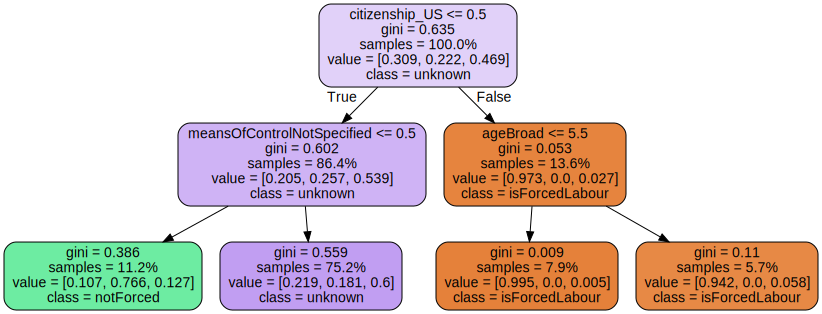

In [59]:
# Export decision tree
dot_data = export_graphviz(dt, out_file=None,feature_names=features.columns,class_names=['isForcedLabour', 'notForced', 'unknown'],
                           filled=True, rounded=True, proportion=True)

# Display it
graphviz.Source(dot_data)

### Findings

- Looking at the decision tree, it is quite inconclusive. 
- At a glance, the dataset tells us that those with US citizenship doesnt provided data as to whether or not they are forced into labour.

## Logistics Regression

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [62]:
# Split into train/test sets
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [63]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_tr,y_tr)
accuracy = dummy.score(X_te,y_te)
print ('Most frequent baseline: {:.3f}'.format(accuracy))

Most frequent baseline: 0.469


In [64]:
logreg = LogisticRegression()
logreg.fit(X_tr,y_tr)
accuracy = logreg.score(X_te,y_te)
print ('Accuracy:{:.3f}'.format(accuracy))

C:\Users\Zuriati\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Zuriati\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy:0.813


# In theory, this model will be used in our application to assess if a person is a potential victim/exploited slave by pass the inputs thru the model.